# Homework 1

## Introduction

#### Topics

You will practice the following things in this assignment:

 * Python:
    * Functions
    * Numpy:
        * Working with the shape of an array: `shape`, `reshape()`
        * Array indexing and slicing
        * Mathematical operations on arrays, including broadcasting
 * Miscellaneous:
    * Representation of images using the RGB (red green blue) color model

#### Due date and submission

Please submit this assignment by 5pm on Friday, Jan 31.  To submit, choose "Save a copy in GitHub" from the colab File menu.  Note that you can save multiple times and I will just look at your last submission.

#### Collaboration

You are allowed to work with other students on this assignment, but you must submit your own work.  In the long term, you will not be helping yourself if you copy and paste another student's answers.  Your goal should be to understand things so that you are building a useful skill.

## Import libraries
The following code imports the following libraries:

 * `numpy`: The `as np` part means that later on, you can refer to functions from numpy using the shorthand `np` instead of typing out `numpy`.  It's standard to import numpy as `np`; everyone will know that `np` stands for numpy when they read your code.
 * `matplotlib.pyplot`: Here, `matplotlib` is the main library (or module) and `pyplot` is a *submodule* of it.  Matplotlib is one of many libraries for plotting in Python, and is the one we'll use in this class.  Matplotlib itself has multiple ways you can create plots.  Pyplot is one approach that is relatively simple.  We'll learn a little more about creating plots with matplotlib and pyplot later on.  Again, it is common to import `matplotlib.pyplot` as `plt`, and we will use `plt` as a shorthand for `pyplot` in our code below.
 * `imageio`: This is a module for image input and output.  We'll use it to read in a picture.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

## Problems

### 1. Benedict the Cat

The following code reads in and plots a picture of my pet cat Benedict:

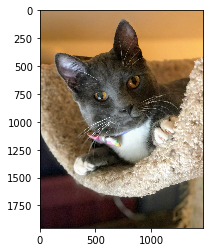

In [47]:
benedict_path = "http://www.evanlray.com/stat344ne_s2020/homework/hw1/benedict.jpg"
benedict = np.array(imageio.imread(benedict_path))
plt.imshow(benedict)

Benedict's picture is stored in a 3-dimensional numpy array.  This array represents the colors in each pixel of the image (think of a pixel as a very small square part of the image that contains only one color).  The three dimensions of the array are the number of rows (height of the image), columns (width of the image), and 3 *channels* representing the color of the pixel in terms of how much red, blue, and green (RGB) color it has.  The numbers in the array are integers between 0 and 255.  For example, the top left pixel in this image has RGB values of `[172, 138, 101]`, meaning that that color has a large amount of red in it, a little less green, and still less blue.  When you add those colors together you get a kind of orange-ish brown color.  The colors add togeher like light, so RGB values of `[0, 0, 0]` represent a black color and RGB values of `[255, 255, 255]` represent a white color.  See https://en.wikipedia.org/wiki/RGB_color_model if you want to read more about how this works.

#### a. Verify that the top left pixel's RGB values are `[172, 138, 101]` by printing them out.

In [0]:
benedict[0, 0, :]

#### b. What are the height and width of this picture of Benedict, in units of pixels?  (Answer by finding the number of rows and columns of the array.)

In [5]:
benedict.shape

(1951, 1463, 3)

#### c. In the rest of this assignment we will work with a square image that contains Benedict's face.  Create a new array called `benedict_square` that focuses in on Benedict's face, and plot your zoomed-in Benedict picture.

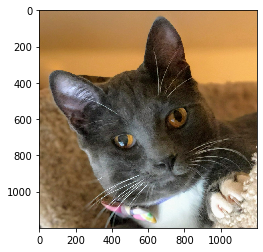

In [9]:
benedict_square = benedict[50:1250, 75:1275, :]
plt.imshow(benedict_square)

#### d. Suppose I want to tint this picture by making it darker.  To do that, we want to move all of the pixel RGB values closer to `[0,0,0]`.  But we also need to remember that in this encoding of the image, the RGB values must be integers.  Create a new image called `benedict_tinted` by multiplying `benedict_square` by 0.5, and then converting the data type of the result to `int` (which truncates the decimals -- for example, 88.5 would be converted to 88; this is not a problem for our purposes).  Then plot your tinted image.

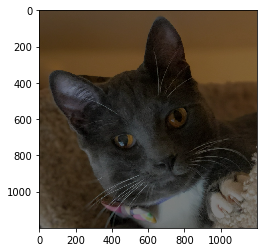

In [19]:
benedict_tinted = benedict_square * 0.5
benedict_tinted = benedict_tinted.astype(int)
plt.imshow(benedict_tinted)

#### e. Now suppose I just want to reduce the amount of red in the image.  Create a new version of the image called `benedict_less_red` that scales down only the red color to 0.2 times its original value without changing the values in the blue and green channels.  Do this by multiplying `benedict_square` by an appropriate array using broadcasting.  I found it easiest to first create a one-dimensional array with the scaling constants for each channel and then `reshape` that array so that broadcasting would work as desired.  You will again have to convert to integer type.  Plot your new image.

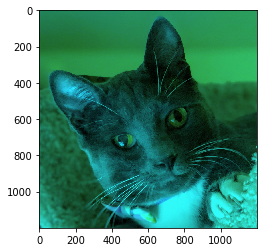

In [60]:
scaling_array = np.array([0.2, 1, 1])
scaling_array.reshape((1, 1, 3))
benedict_less_red = benedict_square * scaling_array
benedict_less_red = benedict_less_red.astype(int)
plt.imshow(benedict_less_red)

#### f. Now we want to generalize this functionality.  Write a function called `rgb_tint` that takes four arguments: an `image` to tint and `r_tint`, `g_tint`, `b_tint` values that are scaling factors between 0 and 1 to apply to each channel of the image.  The function should return a tinted version of the original image.  Your function should be appropriately documented with a docstring describing what it does.  Finally, call your function with a red tint factor of 0.6, a green tint factor of 0.1, and a blue tint factor of 1.0 to see what Benedict might look like under a blacklight.  Save the result as benedict_blacklight and plot the result.

If you need a refresher on how writing python functions works, check out the description at https://github.com/mhc-stat344ne-s2020/Python_NumPy_foundations/blob/master/Python.ipynb

I encourage you to try to re-create your code from the previous part from memory rather than copying and pasting; science says you learn more quickly that way.

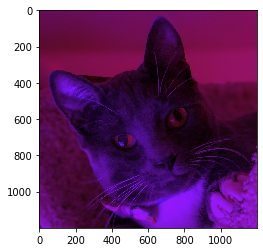

In [38]:
def rgb_tint(image, r_tint, g_tint, b_tint):
  '''
  Tint an image by separate factors along the red, green, and blue channels
  
  Arguments:
   - image: a numpy array with an image
   - r_tint: a number between 0 and 1 to use in tinting the red channel
   - g_tint: a number between 0 and 1 to use in tinting the green channel
   - b_tint: a number between 0 and 1 to use in tinting the blue channel
  
  Return:
   - a numpy array with the tinted image
  '''
  tint_vec = np.array([r_tint, g_tint, b_tint])
  tint_vec.reshape((1, 1, 3))
  image = image * tint_vec
  image = image.astype(int)
  return(image)

benedict_blacklight = rgb_tint(benedict_square, 0.6, 0.1, 1.0)
plt.imshow(benedict_blacklight)

#### g. Create a grayscale version of your square image of Benedict by finding the average value across the red, green, and blue channels for each pixel, and save the result as `benedict_grayscale`.  The result should be a two-dimensional square matrix.  Again, convert to integer type.  When you plot this, add an argument to `plt.imshow` that is `cmap = 'gray'`; otherwise your colors will be artificially mapped to a blue-yellow intensity display.

(1200, 1200)


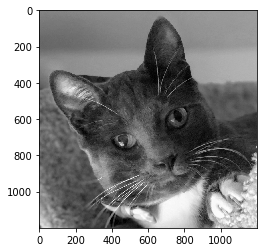

In [41]:
benedict_grayscale = np.mean(benedict_square, axis = 2)
benedict_grayscale = benedict_grayscale.astype(int)
print(benedict_grayscale.shape)
plt.imshow(benedict_grayscale, cmap = 'gray')

#### h. Create a version of grayscale Benedict with a linear fade on the brightness of the image from left to right.  This can be achieved with a matrix product with the `linear_fade` matrix created below.  Plot the result.  Also, write a couple of sentences explaining how this works: What is in the `linear_fade` matrix?  Why does this matrix multiplication result in a fade from left to right on the image?  You may want to check out the documentation for the [np.diag](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html) and [np.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) functions.

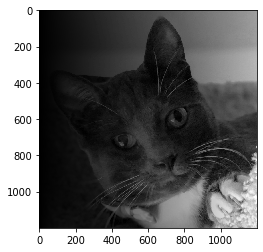

In [54]:
linear_fade = np.diag(np.linspace(start = 0.0, stop = 1.0, num = benedict_greyscale.shape[1]))
plt.imshow(np.dot(benedict_greyscale, linear_fade), cmap = 'gray')

(write your explanation here)

#### i. Create a transposed copy of grayscale Benedict, and plot it.

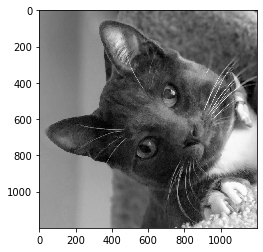

In [51]:
plt.imshow(benedict_greyscale.T, cmap = 'gray')